## Exercise
#### Part A: Taylor approximation diagnostics
##### ▶ Approximate $log(x+1)$ around $x_0 = 0$ with order $1$ and $2$.
##### ▶ Plot true vs approx and plot error on $(−1, 1)$.
##### ▶ Report max error for each order on $[−0.5, 0.5]$ and on $[−0.99, 0.99]$. 

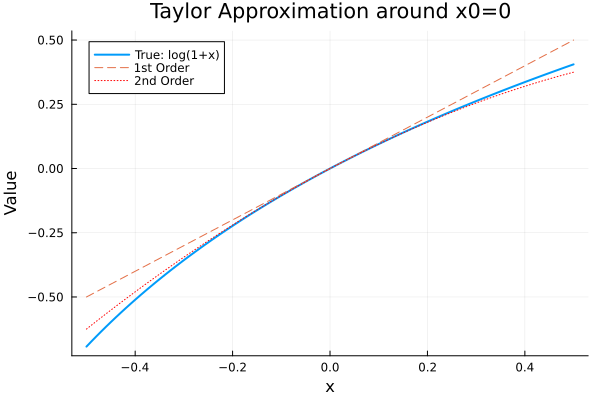

In [11]:
function og(x)
    return log(x+1)
end 

function log_taylor_first(x,x0)
    return log(1+x0) + 1/(1+x0) * (x - x0) 
end

function log_taylor_second(x,x0)
    return log(1+x0) + 1/(1+x0) * (x - x0) + -0.5*1/(1+x0)^2 * (x-x0)^2
end

using Plots

x_grid = range(-0.5, 0.5, length=100)
x0 = 0.0

# Beregn verdier for alle punkter i rutenettet ved hjelp av '.' (broadcasting)
y_true = og.(x_grid)
y_t1   = log_taylor_first.(x_grid, x0)
y_t2   = log_taylor_second.(x_grid, x0)

# Lag plottet
plot(x_grid, y_true, label="True: log(1+x)", lw=2)
plot!(x_grid, y_t1, label="1st Order", ls=:dash)
plot!(x_grid, y_t2, label="2nd Order", ls=:dot, color =:red)
title!("Taylor Approximation around x0=0")
xlabel!("x")
ylabel!("Value")



In [ ]:
function report_errors(interval_name, true_y, t1, t2)
    max_err1 = maximum(abs.(true_y .- t1))
    max_err2 = maximum(abs.(true_y .- t2))
    
    println("--- Error Report for $interval_name ---")
    println("Max Error (1st Order): ", round(max_err1, digits=6))
    println("Max Error (2nd Order): ", round(max_err2, digits=6))
    println("")
end

x_small = range(-0.5, 0.5, length=1000)
report_errors("[-0.5, 0.5]", og.(x_small), log_taylor_first.(x_small, 0), log_taylor_second.(x_small, 0))

x_large = range(-0.99, 0.99, length=1000)
report_errors("[-0.99, 0.99]", og.(x_large), log_taylor_first.(x_large, 0), log_taylor_second.(x_large, 0))

--- Error Report for [-0.5, 0.5] ---
Max Error (1st Order): 0.193147
Max Error (2nd Order): 0.068147

--- Error Report for [-0.99, 0.99] ---
Max Error (1st Order): 3.61517
Max Error (2nd Order): 3.12512



#### Part B: Delta–Gamma PnL
##### ▶ Use BS call price with $S_0 = 100$, $K = 100$, $r = 0.02$, $T = 0.5$, $σ = 0.25$.
##### ▶ Compute exact PnL vs Delta–Gamma PnL on $∆S ∈ [−20, 20]$.
##### ▶ Plot PnL curves and the approximation error